imports

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd
from XGBoost_setup import best_parameters_classification, predict_classification, scores_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


## data analyse

import data

In [10]:
df = pd.read_csv("data/classification/Mental Health Dataset.csv")
df = df.drop("Timestamp", axis=1)
df.describe().T
#self_employed missing values
df["self_employed"].fillna("Unknown", inplace=True)

C:\Users\mathy\AppData\Local\Temp\ipykernel_22300\155347338.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["self_employed"].fillna("Unknown", inplace=True)


data vis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

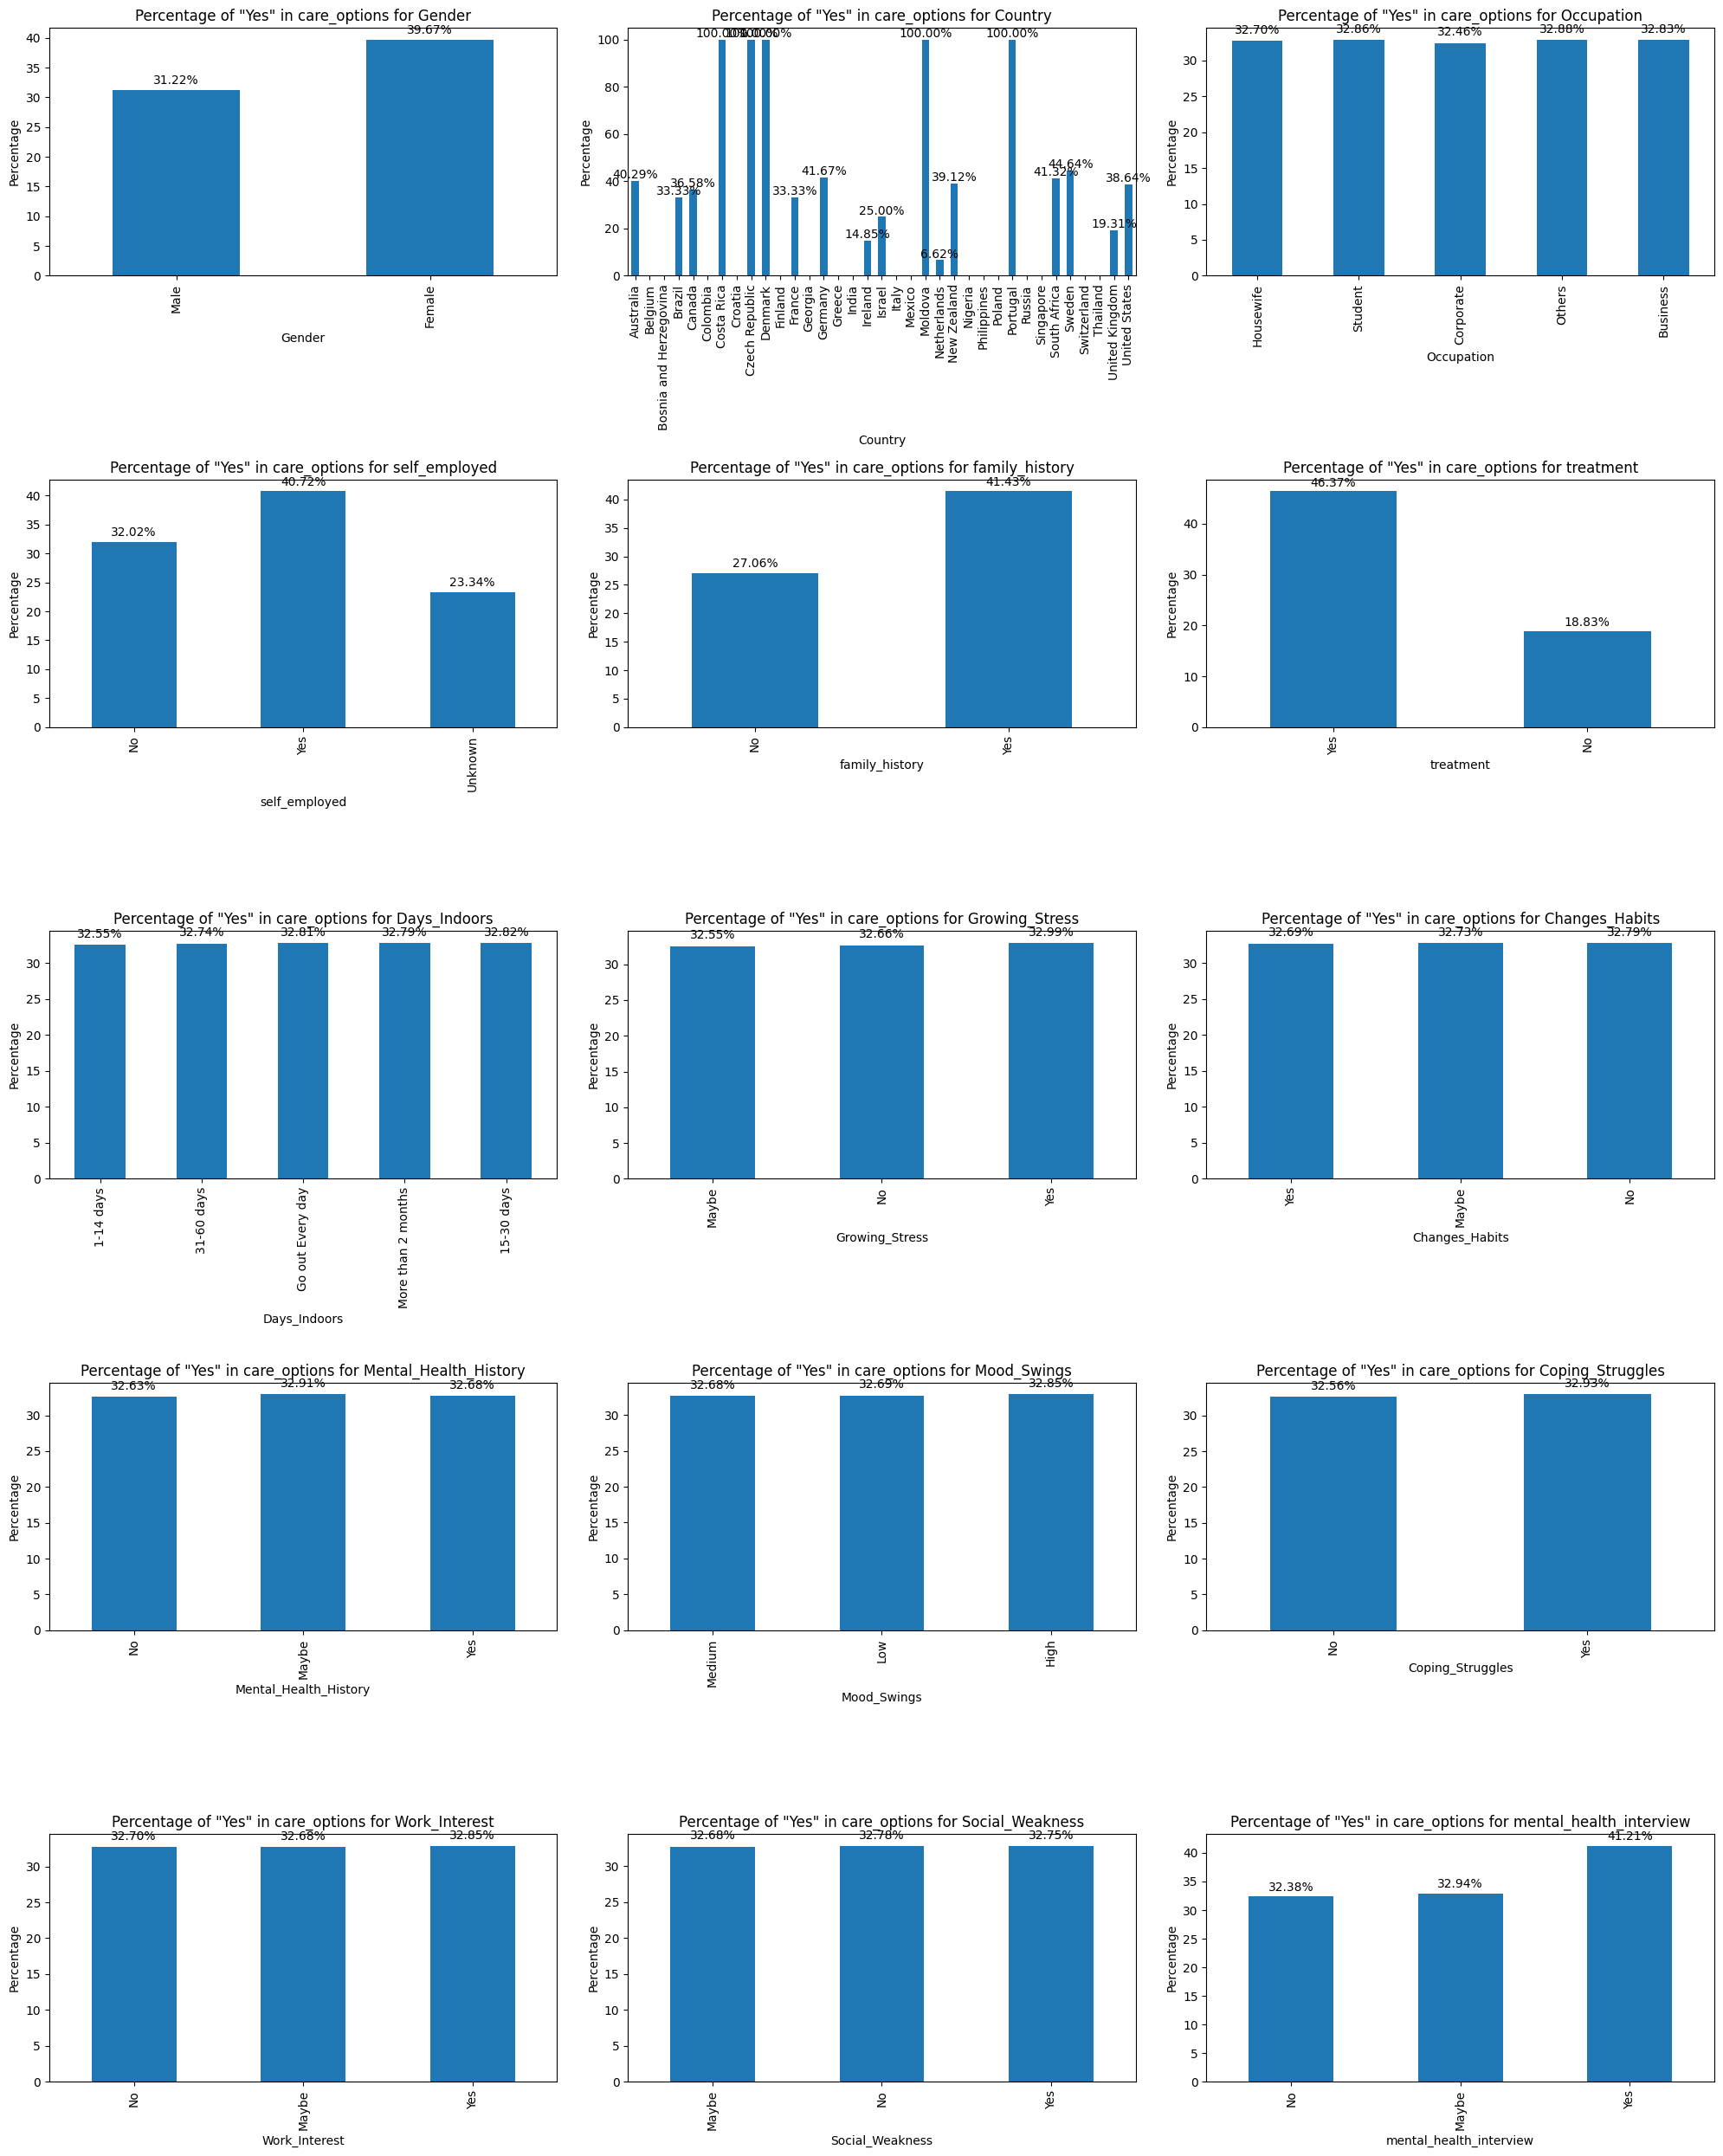

In [11]:
#plot hist 2D of all features frequency
df_yes = df[df['care_options'] == 'Yes']

# Determine the number of columns to plot
num_columns = len(df.columns) - 1  # Exclude 'care_options'
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'care_options':
        ax = axes[i]
        if df[column].dtype == 'object':
            total_counts = df[column].value_counts()
            yes_counts = df_yes[column].value_counts()
            percentage_yes = (yes_counts / total_counts) * 100
            percentage_yes.plot(kind='bar', ax=ax)
            ax.set_title(f'Percentage of "Yes" in care_options for {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Percentage')
            for j, v in enumerate(percentage_yes):
                ax.text(j, v + 1, f"{v:.2f}%", ha='center')
        else:
            # For numerical columns, you might want to bin the data first
            df['binned'] = pd.cut(df[column], bins=10)
            total_counts = df['binned'].value_counts()
            yes_counts = df_yes['binned'].value_counts()
            percentage_yes = (yes_counts / total_counts) * 100
            percentage_yes.plot(kind='bar', ax=ax)
            ax.set_title(f'Percentage of "Yes" in care_options for {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Percentage')
            for j, v in enumerate(percentage_yes):
                ax.text(j, v + 1, f"{v:.2f}%", ha='center')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

if a variable as stronger results than the other this can show a correlation

Encode the string values

In [ ]:
label_encoder = LabelEncoder()
df["Country"] = label_encoder.fit_transform(df["Country"])
mappings = {
    "Gender": {"Male": 0,"Female":1},
    "Occupation": {"Housewife": 0, "Student": 1, "Corporate": 2, "Others": 3, "Business": 4},
    "self_employed": {"Yes": 0, "No": 1, "Unknown": 2},
    "family_history": {"Yes": 0, "No": 1},
    "treatment": {"Yes": 0, "No": 1},
    "Days_Indoors": {"1-14 days":0,"15-30 days":1,"31-60 days":2,"More than 2 months":3,"Go out Every day":4},
    "Growing_Stress": {"Yes": 0, "No": 1,"Maybe":2},
    "Changes_Habits": {"Yes": 0, "No": 1,"Maybe":2},
    "Mental_Health_History": {"Yes": 0, "No": 1,"Maybe":2},
    "Mood_Swings": {"Low":0,"Medium":1,"High":2},
    "Copingt_Struggles": {"Yes": 0, "No": 1},
    "Work_Interest": {"Yes": 0, "No": 1,"Maybe":2},
    "Social_Weakness": {"Yes": 0, "No": 1,"Maybe":2},
    "mental_health_interview": {"Yes": 0, "No": 1,"Maybe":2},
    "Coping_Struggles": {"Yes": 0, "No": 1,"Maybe":2},
    "care_options": {"Yes": 0, "No": 1,"Not sure":2},
}
df.replace(mappings, inplace=True)

df


C:\Users\mathy\AppData\Local\Temp\ipykernel_22300\3573818242.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mappings, inplace=True)


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,1,34,2,2,1,0,0,0,1,0,1,1,1,0,1,2
1,1,34,2,2,0,0,0,0,1,0,1,1,1,0,1,1
2,1,34,2,2,0,0,0,0,1,0,1,1,1,0,1,0
3,1,34,2,1,0,0,0,0,1,0,1,1,1,0,2,0
4,1,34,2,1,0,0,0,0,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,0,34,4,0,0,0,1,1,2,1,0,0,1,2,2,2
292360,0,29,4,1,0,0,1,1,2,1,0,0,1,2,1,0
292361,0,34,4,1,0,1,1,1,2,1,0,0,1,2,1,1
292362,0,34,4,1,0,0,1,1,2,1,0,0,1,2,1,0


correlation matrix

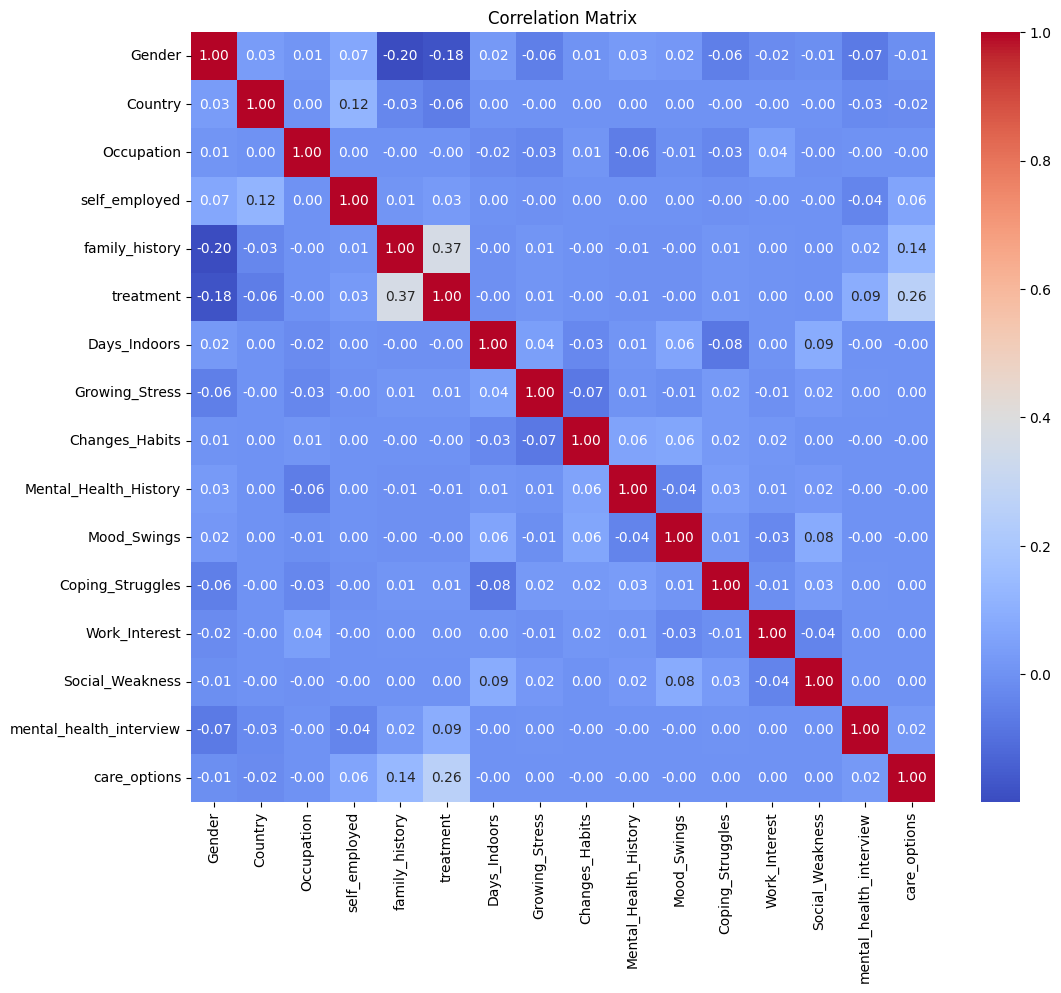

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

corrrelation with the output

In [14]:
corr_matrix["care_options"].sort_values(ascending=False)
corr_matrix["care_options"]

Gender                    -0.007921
Country                   -0.017066
Occupation                -0.000088
self_employed              0.060355
family_history             0.136039
treatment                  0.256427
Days_Indoors              -0.000181
Growing_Stress             0.000449
Changes_Habits            -0.000044
Mental_Health_History     -0.000228
Mood_Swings               -0.000152
Coping_Struggles           0.000446
Work_Interest              0.000156
Social_Weakness            0.000068
mental_health_interview    0.022851
care_options               1.000000
Name: care_options, dtype: float64

## XGBoost use

split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("care_options", axis=1), df["care_options"], test_size=0.70, random_state=42)

Processing

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\mathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\User

{'subsample': 0.7, 'objective': 'multi:softmax', 'min_child_weight': 5, 'max_depth': 10, 'lambda': 0.1, 'gamma': 0.1, 'eta': 0.01, 'alpha': 1}


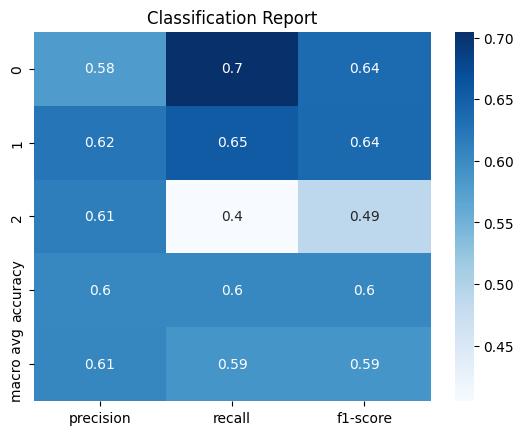

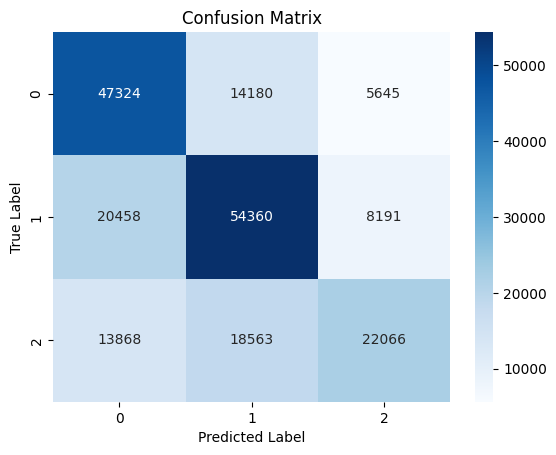

The overall accuracy is:  0.6046761623219564
The overall precision is:  0.6069681916827828
The overall recall is:  0.6046761623219564
The overall f1 is:  0.5979272851207169
The classification report is:  {'0': {'precision': 0.5795958358848745, 'recall': 0.7047610537759311, 'f1-score': 0.6360795435453195, 'support': 67149.0}, '1': {'precision': 0.6240887225468698, 'recall': 0.6548687491717765, 'f1-score': 0.6391083521444695, 'support': 83009.0}, '2': {'precision': 0.6146175700518077, 'recall': 0.4049030221847074, 'f1-score': 0.4881912410535515, 'support': 54497.0}, 'accuracy': 0.6046761623219564, 'macro avg': {'precision': 0.6061007094945173, 'recall': 0.5881776083774717, 'f1-score': 0.5877930455811134, 'support': 204655.0}, 'weighted avg': {'precision': 0.6069681916827828, 'recall': 0.6046761623219564, 'f1-score': 0.5979272851207169, 'support': 204655.0}}


In [16]:
best_param = best_parameters_classification(X_train, y_train)
best_param

y_pred = predict_classification(X_train, y_train, X_test, best_param)

scores_classification(y_test, y_pred)